In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import pandas as pd
import requests
import os
import re
import time
import numpy as np
import holidays
from datetime import datetime, timedelta
from scipy.stats import skew, kurtosis
from scipy.optimize import brentq
import scipy.stats as si
from scipy.stats import norm
import matplotlib.patches as patches
import ast
from polygon import RESTClient
from polygon.rest.models.request import RequestOptionBuilder
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
from requests.exceptions import HTTPError
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.patches as patches
API_KEY = "HsOX1rl8t3B1AJfl4O2uqscUp372l7EF"
us_holidays = holidays.US(years=2024)
dst_start = pd.to_datetime('2024-03-10')
dst_end = pd.to_datetime('2024-11-03')

In [21]:
# ivolatility connection
import ivolatility as ivol
apiKey = 'oSCtrIieh331T0Q1'
ivol.setLoginParams(apiKey=apiKey)

In [42]:
getMarketData = ivol.setMethod('/equities/intraday/single-equity-optionsymbol-rawiv')
marketData = getMarketData(optionSymbol='SPY   240816P00551000', date='2024-08-16', minuteType='MINUTE_1')

In [43]:
marketData

,timestamp,stockId,stockSymbol,optionExpirationDate,optionStrike,optionType,optionStyle,optionSymbol,optionBidPrice,optionAskPrice,optionBidDateTime,optionAskDateTime,optionBidSize,optionAskSize,optionBidExchange,optionAskExchange,optionVolume,optionIv,underlyingPrice,optionDelta,optionGamma,optionTheta,optionVega,optionRho,optionPreIv,optionImpliedYield,calcTimestamp
0,2024-08-16 09:30:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,0.85,0.86,2024-08-15 16:02:01,2024-08-15 16:02:01,145,23,PO,BX,0,0.1490,553.0700,-0.30798,0.082088,-0.738379,0.10342,-0.00423,0.1490,0.000000,2024-08-16 09:25:52
1,2024-08-16 09:31:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.27,1.29,2024-08-16 09:30:16,2024-08-16 09:30:16,90,110,Q,BO,341,0.2638,552.4425,-0.42736,0.097295,-3.939765,0.06020,-0.00183,0.2638,1.747835,2024-08-16 09:30:23
2,2024-08-16 09:32:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.25,1.27,2024-08-16 09:31:35,2024-08-16 09:31:35,201,110,MP,PO,3177,0.2647,552.4954,-0.42235,0.096898,-3.938713,0.06023,-0.00180,0.2647,1.753613,2024-08-16 09:31:42
3,2024-08-16 09:33:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.25,1.26,2024-08-16 09:32:16,2024-08-16 09:32:16,30,134,MP,MP,3920,0.2641,552.4966,-0.42203,0.097159,-3.936049,0.06020,-0.00180,0.2641,1.756516,2024-08-16 09:32:22
4,2024-08-16 09:34:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.30,1.31,2024-08-16 09:33:36,2024-08-16 09:33:36,101,56,C2,XO,5496,0.2649,552.3854,-0.43294,0.097530,-3.994744,0.05980,-0.00184,0.2649,1.762352,2024-08-16 09:33:43
5,2024-08-16 09:35:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.31,1.32,2024-08-16 09:34:15,2024-08-16 09:34:15,6,184,MO,BO,6772,0.2698,552.4269,-0.43006,0.095717,-4.040747,0.05977,-0.00182,0.2698,1.765284,2024-08-16 09:34:22
6,2024-08-16 09:36:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.24,1.25,2024-08-16 09:35:35,2024-08-16 09:35:35,84,74,MO,PO,8702,0.2689,552.5707,-0.41594,0.095562,-3.984605,0.06007,-0.00175,0.2689,1.771179,2024-08-16 09:35:42
7,2024-08-16 09:37:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.16,1.17,2024-08-16 09:36:16,2024-08-16 09:36:16,290,36,Y,MP,9637,0.2672,552.7410,-0.39918,0.095200,-3.898198,0.05814,-0.00168,0.2672,1.774140,2024-08-16 09:36:22
8,2024-08-16 09:38:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.26,1.27,2024-08-16 09:37:36,2024-08-16 09:37:36,54,301,PO,ME,12177,0.2666,552.4831,-0.42356,0.096980,-4.002595,0.05975,-0.00178,0.2666,1.780094,2024-08-16 09:37:42
9,2024-08-16 09:39:00,627,SPY,2024-08-16,551.0,P,A,SPY 240816P00551000,1.20,1.21,2024-08-16 09:38:16,2024-08-16 09:38:16,98,230,MO,MP,12684,0.2680,552.6410,-0.40929,0.095404,-3.952790,0.05893,-0.00172,0.2680,1.783086,2024-08-16 09:38:22


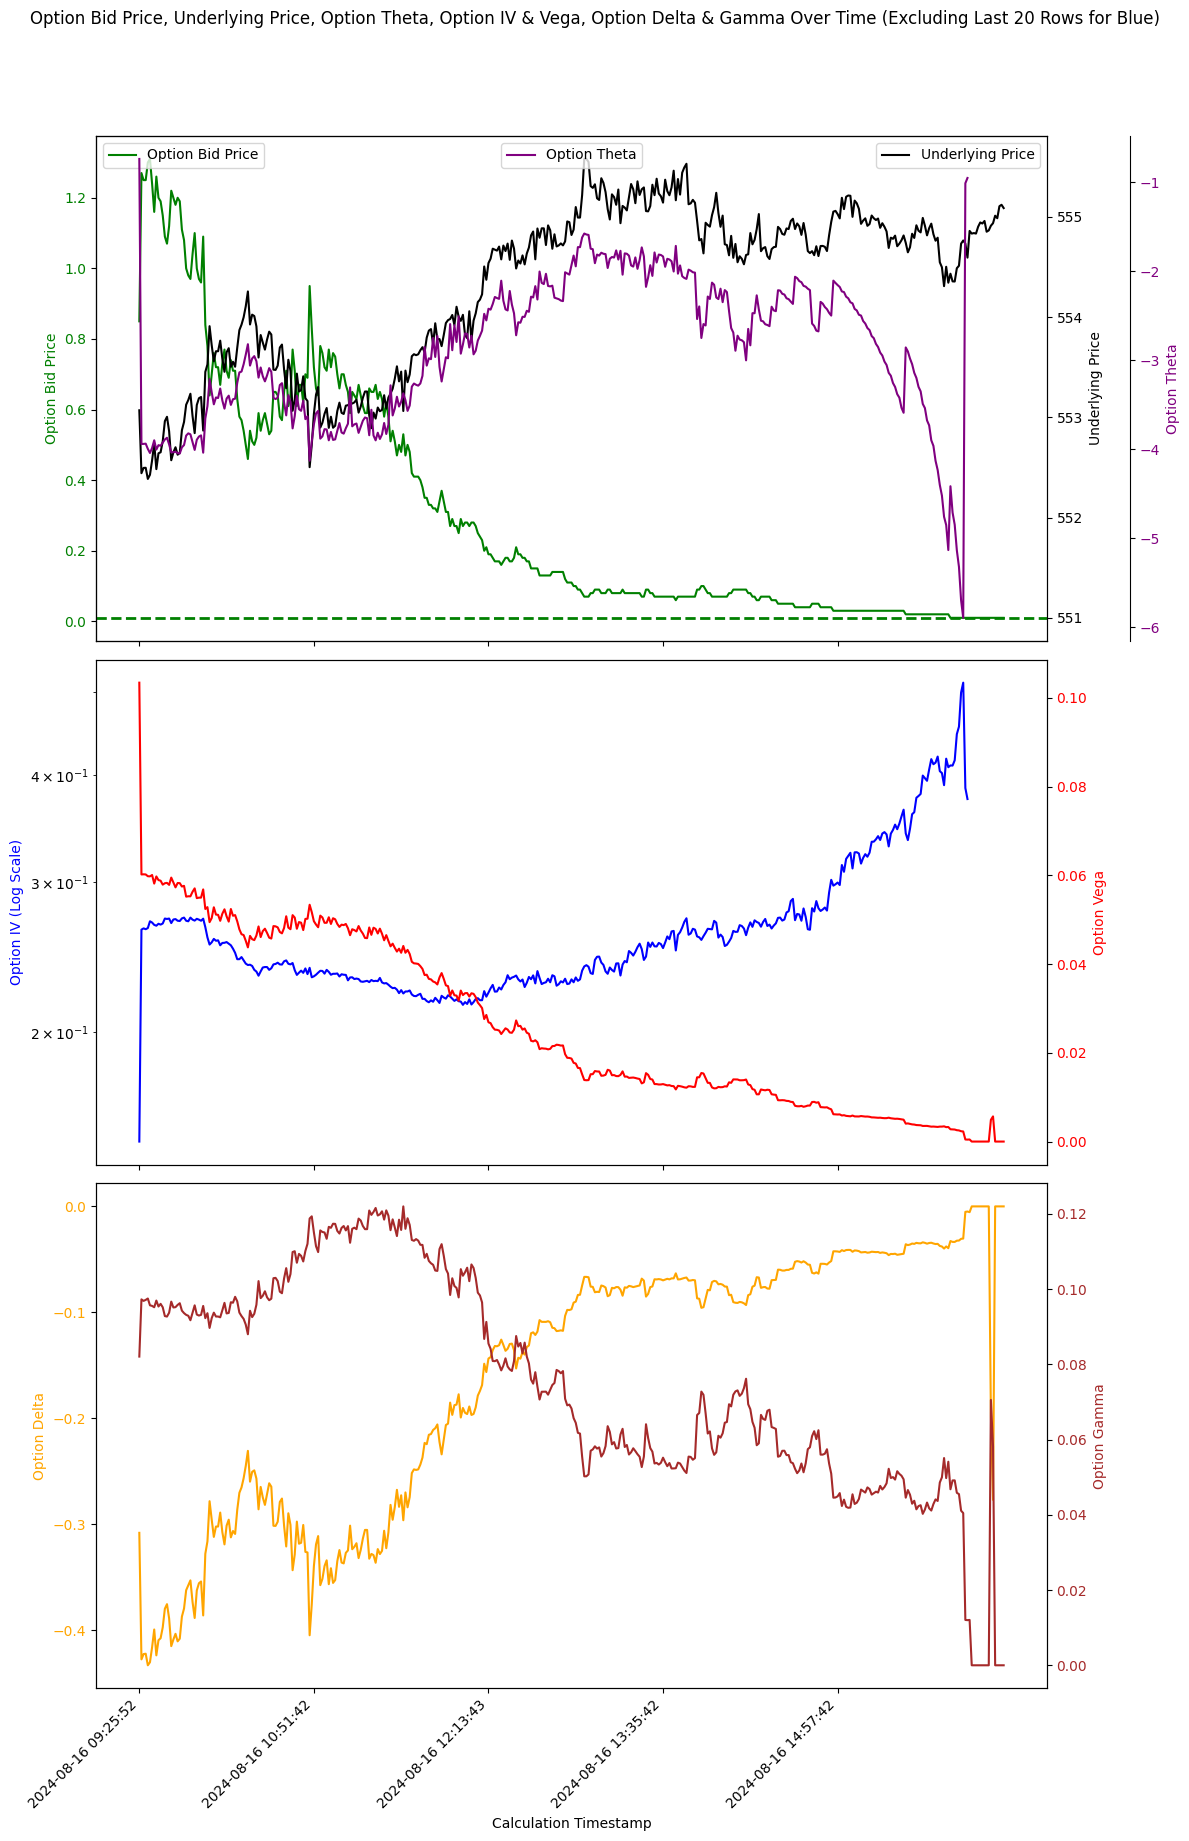

In [75]:
import matplotlib.pyplot as plt

# Define the number of rows to exclude at the start and end for the purple and blue lines
n = 20  # Last n rows to exclude
s = 0   # First s rows to exclude

# Creating a figure with three subplots, one above the other
fig, (ax1, ax5, ax7) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plotting optionBidPrice on the left y-axis in the first subplot (no rows excluded)
ax1.plot(marketData['calcTimestamp'], marketData['optionBidPrice'], color='green')
ax1.set_ylabel('Option Bid Price', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Adding a secondary y-axis for underlyingPrice in the first subplot (no rows excluded)
ax2 = ax1.twinx()
ax2.plot(marketData['calcTimestamp'], marketData['underlyingPrice'], color='black')
ax2.set_ylabel('Underlying Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding a third y-axis for Option Theta in the first subplot
ax_theta = ax1.twinx()
ax_theta.spines["right"].set_position(("outward", 60))  # Move the third y-axis to the right
ax_theta.plot(marketData['calcTimestamp'][s:-n], marketData['optionTheta'][s:-n], color='purple')
ax_theta.set_ylabel('Option Theta', color='purple')
ax_theta.tick_params(axis='y', labelcolor='purple')

# Adding a horizontal line at the optionStrike value from iloc[0] on the right y-axis in the first subplot
option_strike_value = marketData['optionStrike'].iloc[0]
ax2.axhline(y=option_strike_value, color='green', linestyle='--', linewidth=2)  # Plotting on the right y-axis (ax2)

# Adding legends to the first subplot to clarify which line is which
ax1.legend(['Option Bid Price'], loc='upper left')
ax2.legend(['Underlying Price'], loc='upper right')
ax_theta.legend(['Option Theta'], loc='upper center')

# Plotting optionIV and optionVega in the second subplot
ax5.plot(marketData['calcTimestamp'][s:-n], marketData['optionIv'][s:-n], color='blue')
ax5.set_ylabel('Option IV (Log Scale)', color='blue')
ax5.tick_params(axis='y', labelcolor='blue')
ax5.set_yscale('log')  # Set logarithmic scale for Option IV

# Adding a secondary y-axis for optionVega in the same subplot
ax6 = ax5.twinx()
ax6.plot(marketData['calcTimestamp'], marketData['optionVega'], color='red')
ax6.set_ylabel('Option Vega', color='red')
ax6.tick_params(axis='y', labelcolor='red')

# Plotting optionDelta and optionGamma in the third subplot
ax7.plot(marketData['calcTimestamp'], marketData['optionDelta'], color='orange')
ax7.set_ylabel('Option Delta', color='orange')
ax7.tick_params(axis='y', labelcolor='orange')

# Adding a secondary y-axis for optionGamma in the same subplot
ax8 = ax7.twinx()
ax8.plot(marketData['calcTimestamp'], marketData['optionGamma'], color='brown')
ax8.set_ylabel('Option Gamma', color='brown')
ax8.tick_params(axis='y', labelcolor='brown')

# Setting the x-label on the bottom subplot
ax7.set_xlabel('Calculation Timestamp')

# Rotating x-axis labels for better readability on all plots
for ax in [ax1, ax5, ax7]:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Display only every nth label to reduce clutter on the x-axis
n_ticks = max(1, len(marketData) // 5)  # Display approximately 10 labels
ax7.set_xticks(ax7.get_xticks()[::n_ticks])

# Adjust layout to fit everything nicely
plt.tight_layout()

# Display the plot
plt.suptitle('Option Bid Price, Underlying Price, Option Theta, Option IV & Vega, Option Delta & Gamma Over Time (Excluding Last 20 Rows for Blue)', y=1.02)
plt.subplots_adjust(top=0.95)  # More space for the suptitle
plt.show()
